In [ ]:
#Cargar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar datos
#Regular: 0. #High performance: 1. #Semi-pro: 2
from google.colab import files
uploaded = files.upload()

Saving tennis_players.xlsx to tennis_players (1).xlsx


In [ ]:
#Cargar datos
#Categorias 
medidas = pd.read_excel("tennis_players.xlsx")
medidas = medidas.dropna()
medidas= medidas.sort_values(by="Desempeño")#ordené los sujetos por desempeño para poder analizar bien la matriz de disimilaridad
labels = medidas['Desempeño'] 
#features=features.drop(['nombre,''fecha_evalua','genero','fecha_nacimiento','Desempeño']) #si quisiera quitar cada columna
features = medidas.iloc[:, 4:62] #si quisiera extraerse directamente columnas

## **PROBLEMA 0.** TENER DOS DATAFRAMES DIFERENTES: UNO CON CARACTERISTICAS ANTROPOMETRICAS Y OTRO CON MEDIDAS CAPACIDAD FISICA. EL ANALISIS EN ADELANTE DEBE COMPARAR LOS RESULTADOS CON LOS DOS DIFERENTES DATA FRAMES

## **SEMANA 15**

---



In [ ]:
## Para preprocesar las features
from sklearn import preprocessing
# Hacer escalamiento a los datos
scalar = preprocessing.StandardScaler()#normaliza  media 0 varianza 1. otros escaladores MinMaxScaler y MaxAbsScaler, 
scaled_data=pd.DataFrame(scalar.fit_transform(features))

Text(0, 0.5, 'comp2')

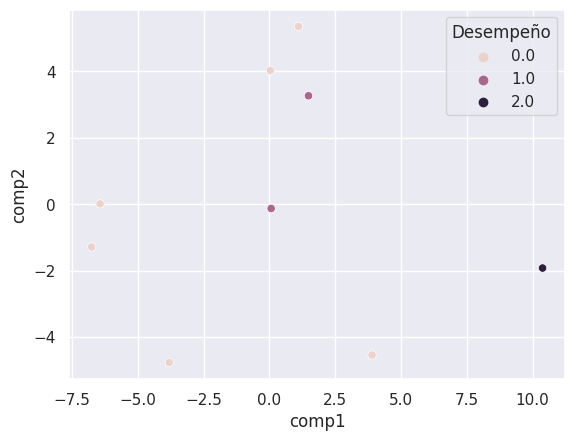

In [ ]:
from sklearn.decomposition import PCA   
# Hacer PCA para obtener una cantidad indicada de componentes principales
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1],hue = labels)
plt.xlabel("comp1")
plt.ylabel("comp2")

## **PROBLEMA 1: COMO VER LAS ETIQUETAS DE CLASE EN SCATTER 3D???** Mostrar gráficas para los dataframes

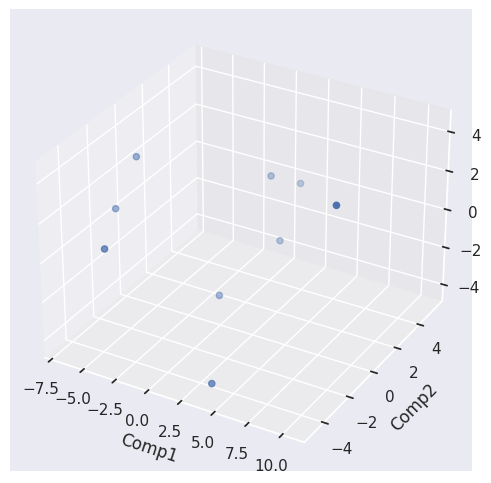

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = "darkgrid")
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection = '3d')

x = data_pca[:,0]
y = data_pca[:,1]
z = data_pca[:,2]
ax.set_xlabel("Comp1")
ax.set_ylabel("Comp2")
ax.set_zlabel("Comp3")

ax.scatter3D(x, y, z)

plt.show()

Matriz de disimilaridad. Entre observaciones o sujetos, puede calcularse la distancia entre vectores de caracteristicas como un solo escalar. Podemos construir una matriz donde se calcula la distancia entre todos y cada uno de las observaciones o sujetos entre si. Entre mas parecidos, menor la distancia

Pueden utilizar otras medidas diferente a la distancia euclidiana. Distancias como Cityblock, Jaccard, Hamming y otras (consultar) pueden construir mejor una matriz de disimilaridad

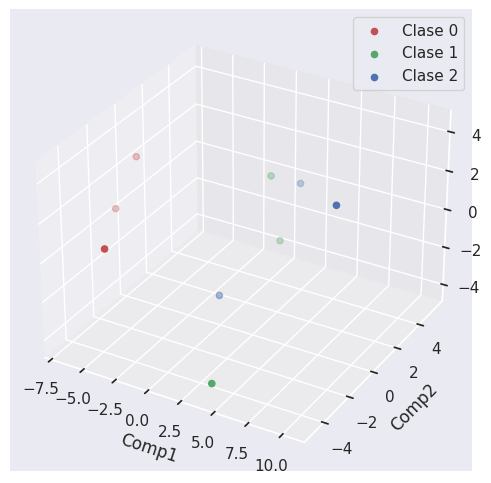

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes las etiquetas de clase en un vector llamado "labels"
labels = np.array([0, 1, 0, 1, 2, 0, 2, 1, 2])

# Definir los colores para cada clase
colors = ['r', 'g', 'b']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

for i, c in enumerate(np.unique(labels)):
    mask = labels == c
    ax.scatter3D(x[mask], y[mask], z[mask], c=colors[i], label='Clase {}'.format(c))

ax.set_xlabel("Comp1")
ax.set_ylabel("Comp2")
ax.set_zlabel("Comp3")

ax.legend()
plt.show()


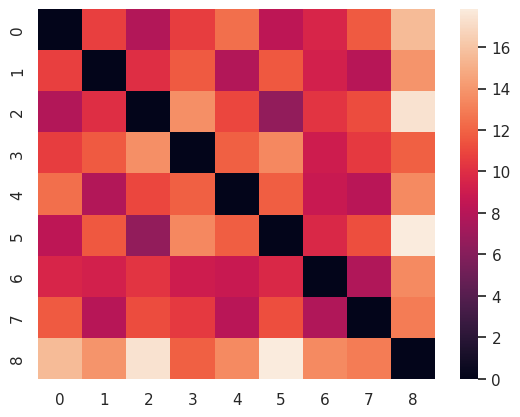

In [ ]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
#MEDIDAS DE DISIMILARIDAD
pairwise=squareform(pdist(scaled_data,'euclidean'))
hm=sns.heatmap(pairwise)

# **Clasificación.** El más sencillo de entendimiento será k-vecinos, debido a que las distancias mas pequeñas indican la cercania de clase.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(features, labels)
y_pred = neigh.predict(features)
print(accuracy_score(labels,y_pred))
print(classification_report(labels,y_pred))
print(confusion_matrix(labels,y_pred))

0.6666666666666666
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.50      0.67      0.57         3
           2       1.00      0.33      0.50         3

    accuracy                           0.67         9
   macro avg       0.75      0.67      0.64         9
weighted avg       0.75      0.67      0.64         9

[[3 0 0]
 [1 2 0]
 [0 2 1]]


Ahora, verán un gran problema. Al elegir mas de un vecino, la clase 2 nunca se detecta. Nuestro estudio tiene muy pocos sujetos, solo un sujeto de clase 2. Por esto, vamos a eliminar este sujeto porque en el proceso de aprendizaje no tenemos con quien comparalo como cercano. Eliminar la fila/sujeto/observacion con etiqueta 2

**PROBLEMA 2**. Cross-validation. La clasificación anterior se entreno con el 100% de los datos, y los desempeños que estamos viendo son de entrenamiento o training results. Si queremos partir los datos en entrenamiento y validacion (training and test), debemos usar estrategias 70-30 o 50-50. Pero tenemos muy pocas observaciones, ¿que hacer? 
La cross-validación nos permite entrenar y validar un clasificador partiendo las observaciones en lotes. Si para 16 observaciones/sujetos partimos en 4 lotes aleatorios de 4 observaciones 4 combinaciones posibles gracias al testing:



* Clasificador 1: 12 obs/suj train. 4 test
* Clasificador 2: 12 obs/suj train. 4 test
* Clasificador 3: 12 obs/suj train. 4 test
* Clasificador 4: 12 obs/suj train. 4 test


Al final las medidas de desempeño serán el promedio de los 4, e inclusive podemos ver la varianza del desempeño

**CONSULTAR E IMPLEMENTAR CROSS-VALIDATION PARA EL CLASIFICADOR KNN Y MOSTRAR MEDIDAS DE DESEMPEÑO PARA LOS DOS DATAFRAMES**. Recordar eliminar antes el sujeto/observacion de etiqueta 2

# **KPCA**

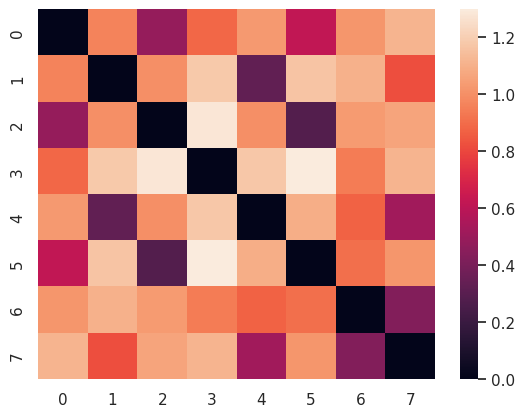

In [ ]:
from sklearn.decomposition import KernelPCA
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
Kernel_pca = KernelPCA(kernel= "rbf",n_components=3)# extracts 2 features, specify the kernel as rbf
scaled_data2=scaled_data.iloc[0:8,:] #aqui eliminamos al sujeto de etiqueta 2
Z = Kernel_pca.fit_transform(scaled_data2)
pairwise=squareform(pdist(Z))
hm=sns.heatmap(pairwise)

In [ ]:
features = medidas.iloc[:, 4:64] #si quisiera extraerse directamente columnas
features=features.dropna()
labels = features['Desempeño'] 
#labels2=labels.
sns.scatterplot(x=Z[:, 1], y=Z[:, 2],hue=labels)
#plt.xlabel("caract 1")
#plt.ylabel("carct 2")


ValueError: ignored

In [ ]:
print (Z)

[[ 0.44757707  0.17291889 -0.2704933 ]
 [-0.33361353 -0.35584792 -0.43763697]
 [ 0.55967451 -0.22439577 -0.01977809]
 [-0.18267103  0.7960464  -0.2377852 ]
 [-0.42465689 -0.34651945 -0.12625898]
 [ 0.57865292 -0.13537045  0.24861285]
 [-0.21428959  0.21350361  0.50107494]
 [-0.43067347 -0.12033532  0.34226475]]


In [ ]:
print (labels)

0     0.0
2     0.0
6     0.0
8     0.0
9     0.0
11    0.0
3     1.0
14    1.0
4     2.0
Name: Desempeño, dtype: float64


CLASIFICACIÓN UTILIZANDO VECTORES OBTENIDAS CON KPCA COMO CARACTERISTICAS

In [ ]:
sns.scatterplot(x=Z[:, 1], y=Z[:, 2],hue=labels)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Z, labels)
y_pred = neigh.predict(Z)
print(accuracy_score(labels,y_pred))
print(classification_report(labels,y_pred))
print(confusion_matrix(labels,y_pred))

# **FINALMENTE, PRÓPOSITO DE LA ENTREGA:**

ESTAN LOS DOS DATASET, DONDE SE COMPARARAN

1. Disimilaridad
* Matrices de disimilaridad caracteristicas originales.
* Matrices de disimilaridad caracteristicas PCA
* Matrices de disimilaridad caracteristicas KPCA

Evaluar otras métricas y encontrar una que observen que aumente la disimilaridad entre clases y disminuya entre clases

2. Proyecciones 2D y 3D de PCA y KPCA
* Scatter3D de PCA y KPCA con labels
Pueden probar en KPCA otros kernels distintos a RBF y cambiar el sigma, de nuevo, observando si las proyecciones son mas separables entre clases

3. Clasificación con cross-validación 
Resultados clasificación. Pueden utilizar KNN y SVM. Las SVM aumentaran clasificación sobre caracterisitcas originales y PCA, pero no cambiará mucho el de KPCA, debido a que SVM se basa tambipen en proyección con rbf





**1. DISIMILARIDAD**

Matrices de disimilaridad caracteristicas originales.

Componentes principales:
[[-7.38445326e+02 -4.27200180e+01]
 [-7.32093135e+02 -3.91828921e+01]
 [-7.34295170e+02 -6.89692453e+01]
 [-7.34666149e+02 -4.68462940e+01]
 [-6.36681331e+02 -3.24215963e+01]
 [-7.51800279e+02 -3.21906632e+01]
 [-7.01545791e+02 -5.79403629e+01]
 [-7.41117921e+02 -6.96215371e+01]
 [-7.21751602e+02 -5.12177678e+01]
 [-7.29956206e+02 -3.20356315e+00]
 [-6.74428910e+02  2.22568653e+01]
 [-1.31102676e+02  5.63928361e+02]
 [-7.44179645e+02 -2.99356517e+01]
 [ 9.46360294e+03 -3.27349413e+01]
 [-6.91538797e+02 -7.92006933e+01]]


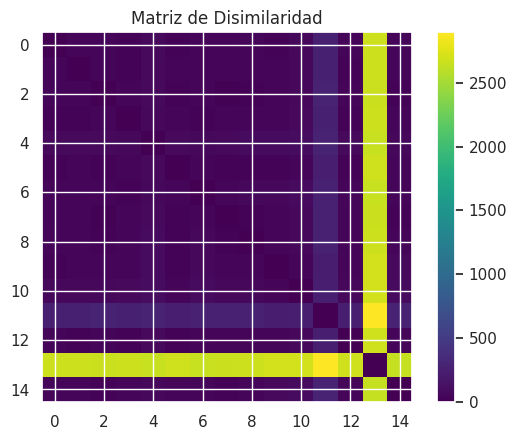

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.metrics.pairwise import pairwise_distances

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('macro_datosantropometricos.xlsx')


# Obtener las características del DataFrame
X = df.values

# Calcular la matriz de disimilaridad utilizando la distancia euclidiana
dis_matrix = pairwise_distances(X, metric='euclidean')

# Aplicar KPCA en la matriz de disimilaridad
kpca = KernelPCA(n_components=2, kernel='linear')
kpca.fit(dis_matrix)

# Obtener las componentes principales
components = kpca.transform(dis_matrix)

# Imprimir las componentes principales
print("Componentes principales:")
print(components)

# Graficar la matriz de disimilaridad
plt.imshow(dis_matrix, cmap='viridis')
plt.title("Matriz de Disimilaridad")
plt.colorbar()
plt.show()

Componentes principales:
[[ -4.77626357 -18.51769416]
 [  2.89858248 -18.18688036]
 [ 36.00442243 -13.15416658]
 [ 75.95849944  59.04397133]
 [ 40.48902113 -22.84406257]
 [-21.93901632  55.3611004 ]
 [-43.08160673  47.9121354 ]
 [ 35.41733978 -17.00210178]
 [ 22.90916861   5.79179112]
 [-47.90466803 -17.5619257 ]
 [-65.25259491  15.60689942]
 [-43.31632331 -21.53602444]
 [ 35.8201279  -23.79657319]
 [-23.22668891 -31.11646887]]


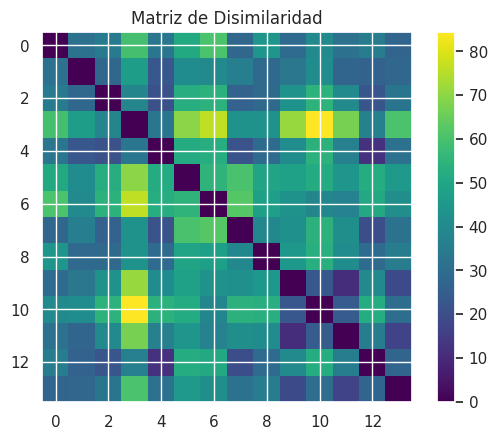

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.metrics.pairwise import pairwise_distances

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('macro_datos_fisicos.xlsx')


# Obtener las características del DataFrame
X = df.values

# Calcular la matriz de disimilaridad utilizando la distancia euclidiana
dis_matrix = pairwise_distances(X, metric='euclidean')

# Aplicar KPCA en la matriz de disimilaridad
kpca = KernelPCA(n_components=2, kernel='linear')
kpca.fit(dis_matrix)

# Obtener las componentes principales
components = kpca.transform(dis_matrix)

# Imprimir las componentes principales
print("Componentes principales:")
print(components)

# Graficar la matriz de disimilaridad
plt.imshow(dis_matrix, cmap='viridis')
plt.title("Matriz de Disimilaridad")
plt.colorbar()
plt.show()

Matriz de Disimilaridad:
[[ 0.         31.35209881 34.73560133 59.41235057 33.05707942 51.13254052
  60.4827339  27.94955679 44.37730952 29.36576919 40.43219757 31.86565549
  35.47963219 27.36114946]
 [31.35209881  0.         28.35220803 47.37323611 23.00399531 40.98455563
  40.50505154 36.19964813 28.88296557 33.32392084 40.98281957 27.6137846
  26.65272219 27.99796421]
 [34.73560133 28.35220803  0.         38.53907887 21.04638924 52.66378357
  54.1678567  26.57325394 29.11402755 43.06245232 54.64637042 40.26924881
  22.66178501 32.75213428]
 [59.41235057 47.37323611 38.53907887  0.         32.97314513 69.57434369
  76.4148356  43.15205586 43.03744881 71.34323654 84.37874732 66.94207496
  36.73447291 60.31868119]
 [33.05707942 23.00399531 21.04638924 32.97314513  0.         51.93260633
  52.49999048 21.58797408 29.46716647 41.11184622 54.12958987 36.63732659
  11.99499062 31.44397558]
 [51.13254052 40.98455563 52.66378357 69.57434369 51.93260633  0.
  54.72647805 60.25078941 49.365031

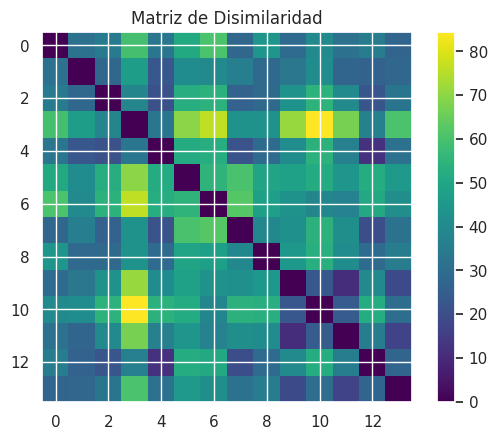

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('macro_datos_fisicos.xlsx')

# Obtener las características del DataFrame
X = df.values

# Calcular el mínimo entre el número de muestras y características
n_components = min(X.shape[0], X.shape[1])

# Realizar el PCA en las características
pca = PCA(n_components=n_components)
pca.fit(X)

# Obtener las componentes principales
components = pca.transform(X)

# Calcular la matriz de disimilaridad utilizando la distancia euclidiana en las componentes principales
dis_matrix = pairwise_distances(components, metric='euclidean')

# Imprimir la matriz de disimilaridad
print("Matriz de Disimilaridad:")
print(dis_matrix)

# Graficar la matriz de disimilaridad
plt.imshow(dis_matrix, cmap='viridis')
plt.title("Matriz de Disimilaridad")
plt.colorbar()
plt.show()

Matriz de Disimilaridad:
[[   0.           41.02060458   39.9834966    31.7239657    69.29740255
    28.84007628   40.77131344   39.01422817   47.49242045   32.32089108
    63.46432068  253.52591584   43.22302627 2672.43969623   51.35211778]
 [  41.02060458    0.           43.48091535   26.4620483    69.24232809
    41.36351049   40.11196829   42.44125352   51.08913779   46.68286624
    67.77868396  255.92479364   30.91245704 2677.32449285   55.06586965]
 [  39.9834966    43.48091535    0.           46.50473094   70.75980497
    31.70031546   54.46815583   11.57713263   22.75983304   53.92643137
    66.751779    271.8405231    39.56096561 2661.20803584   32.74812972]
 [  31.7239657    26.4620483    46.50473094    0.           67.03909307
    40.79387209   25.19186377   43.42418681   54.7901451    41.47348551
    72.04755374  256.88725153   33.47954599 2669.72061834   53.82239311]
 [  69.29740255   69.24232809   70.75980497   67.03909307    0.
    76.569315     62.56908182   70.01271313

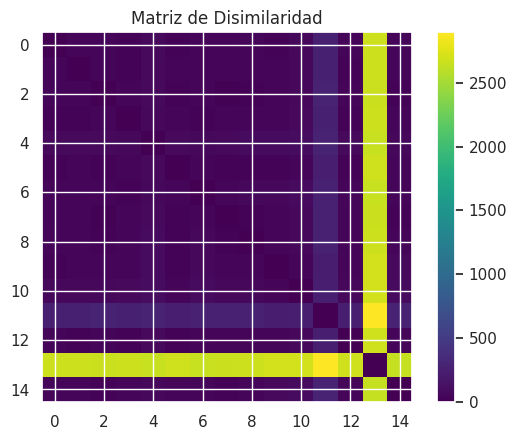

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('macro_datosantropometricos.xlsx')

# Obtener las características del DataFrame
X = df.values

# Calcular el mínimo entre el número de muestras y características
n_components = min(X.shape[0], X.shape[1])

# Realizar el PCA en las características
pca = PCA(n_components=n_components)
pca.fit(X)

# Obtener las componentes principales
components = pca.transform(X)

# Calcular la matriz de disimilaridad utilizando la distancia euclidiana en las componentes principales
dis_matrix = pairwise_distances(components, metric='euclidean')

# Imprimir la matriz de disimilaridad
print("Matriz de Disimilaridad:")
print(dis_matrix)

# Graficar la matriz de disimilaridad
plt.imshow(dis_matrix, cmap='viridis')
plt.title("Matriz de Disimilaridad")
plt.colorbar()
plt.show()

**Proyecciones 2D KPCA**

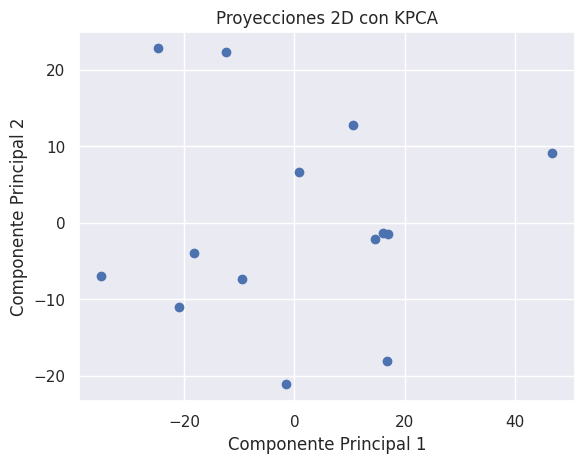

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('macro_datos_fisicos.xlsx')

# Obtener las características del DataFrame
X = df.values

# Aplicar KPCA en las características
kpca = KernelPCA(n_components=2, kernel='linear')
X_kpca = kpca.fit_transform(X)

# Visualizar las proyecciones 2D
plt.scatter(X_kpca[:, 0], X_kpca[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyecciones 2D con KPCA')
plt.show()


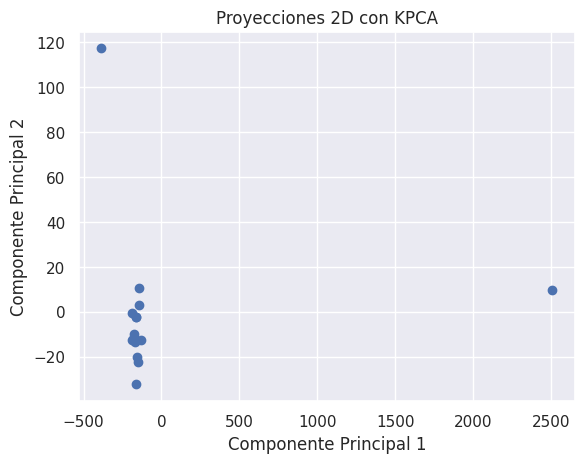

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('macro_datosantropometricos.xlsx')

# Obtener las características del DataFrame
X = df.values

# Aplicar KPCA en las características
kpca = KernelPCA(n_components=2, kernel='linear')
X_kpca = kpca.fit_transform(X)

# Visualizar las proyecciones 2D
plt.scatter(X_kpca[:, 0], X_kpca[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyecciones 2D con KPCA')
plt.show()


Proyecciones 3D

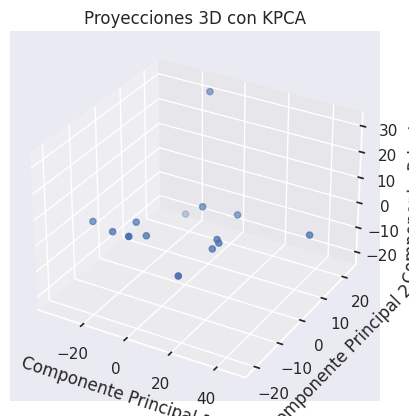

Text(0.10787434422876363, 0.014452421710067033, 'Comp3')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('macro_datos_fisicos.xlsx')

# Obtener las características del DataFrame
X = df.values

# Aplicar KPCA en las características
kpca = KernelPCA(n_components=3, kernel='linear')
X_kpca = kpca.fit_transform(X)

# Visualizar las proyecciones 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_kpca[:, 0], X_kpca[:, 1], X_kpca[:, 2])
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Proyecciones 3D con KPCA')
plt.show()


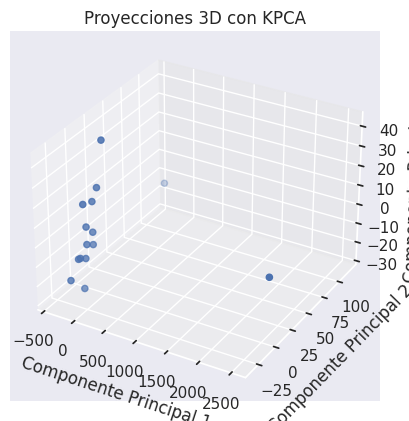

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('macro_datosantropometricos.xlsx')

# Obtener las características del DataFrame
X = df.values

# Aplicar KPCA en las características
kpca = KernelPCA(n_components=3, kernel='linear')
X_kpca = kpca.fit_transform(X)

# Visualizar las proyecciones 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_kpca[:, 0], X_kpca[:, 1], X_kpca[:, 2])
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Proyecciones 3D con KPCA')
plt.show()

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

# Load the data from the Excel file
datos = pd.read_excel('macro_datos_fisicos.xlsx')
datos = datos.iloc[:, 4:]
datos = datos.dropna()
# Separate the features (X) and the labels (y)
X = datos.drop('Desempeño', axis=1)
y = datos['Desempeño']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Predict labels for the training and testing sets
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Print accuracy scores
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# Print classification report
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print confusion matrix
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Perform cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(svm, X, y, scoring=scoring, cv=5)

# Print cross-validation results
print("Cross-Validation Results:")
for metric in scoring:
    print(metric, ":", cv_results['test_' + metric])


Training Accuracy: 0.8
Testing Accuracy: 0.6666666666666666
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88         7
         1.0       1.00      0.50      0.67         2
         2.0       0.00      0.00      0.00         1

    accuracy                           0.80        10
   macro avg       0.59      0.50      0.51        10
weighted avg       0.74      0.80      0.75        10

Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         2
         1.0       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Training Confusion Matrix:
[[7 0 0]
 [1 1 0]
 [1 0 0]]
Testing Confusion Matrix:
[[2 0]
 [1 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Cross-Validation Results:
accuracy : [0.66666667 0.66666667 0.66666667 1.         0.5       ]
precision_macro : [0.33333333 0.33333333 0.33333333 1.         0.25      ]
recall_macro : [0.5 0.5 0.5 1.  0.5]
f1_macro : [0.4        0.4        0.4        1.         0.33333333]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

# Load the data from the Excel file
datos = pd.read_excel('macro_datosantropometricos.xlsx')
datos = datos.iloc[:, 4:]
datos = datos.dropna()
# Separate the features (X) and the labels (y)
X = datos.drop('Desempeño', axis=1)
y = datos['Desempeño']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Predict labels for the training and testing sets
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Print accuracy scores
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# Print classification report
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print confusion matrix
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Perform cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(svm, X, y, scoring=scoring, cv=5)

# Print cross-validation results
print("Cross-Validation Results:")
for metric in scoring:
    print(metric, ":", cv_results['test_' + metric])

Training Accuracy: 0.5833333333333334
Testing Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74         7
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1

    accuracy                           0.58        12
   macro avg       0.19      0.33      0.25        12
weighted avg       0.34      0.58      0.43        12

Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Training Confusion Matrix:
[[7 0 0]
 [4 0 0]
 [1 0 0]]
Testing Confusion Matrix:
[[3]]
Cross-Validation Results:
accuracy : [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
precision_macro : [0.33333333 0.33333333 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/